In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas_datareader as web
import datetime as dt
import math
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('newresultado_join.csv', index_col='Date')
df = df.drop(labels=['Volume', 'polarity', 'subjectivity'], axis=1)
df

,High,Low,Open,Close,Adj Close
Date,,,,,
2017-01-02,60227.0,59371.0,60227.0,59589.0,59589.0
2017-01-03,61815.0,59631.0,59631.0,61814.0,61814.0
2017-01-04,61940.0,61302.0,61811.0,61589.0,61589.0
2017-01-05,62409.0,61594.0,61594.0,62071.0,62071.0
2017-01-06,62072.0,61396.0,62072.0,61665.0,61665.0
...,...,...,...,...,...
2020-12-22,116903.0,115648.0,115825.0,116348.0,116348.0
2020-12-23,118311.0,116636.0,116636.0,117857.0,117857.0
2020-12-28,119213.0,117805.0,117806.0,119051.0,119051.0


In [4]:
X = np.asarray(df.iloc[:738, :-1])
y = np.asarray(df.iloc[:738, -1])

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

In [7]:
X_scaled.shape

(738, 4)

In [8]:
X_train = []
y_train = []
for i in range(20, len(X)):
    X_train.append(X_scaled[i-20:i,:])
    y_train.append(y_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))

In [10]:
X_train.shape

(718, 80)

In [11]:
model = RandomForestRegressor(n_estimators=30)

In [12]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [13]:
dataset_test = pd.read_csv('newresultado_test.csv', index_col='Date')
dataset_test = dataset_test.drop(labels=['Volume', 'polarity', 'subjectivity'], axis=1)
real_stock_price = dataset_test.iloc[:, 4:5].values

In [14]:
dataset_total = pd.concat((df, dataset_test), axis = 0)
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - 20:, :-1]
inputs = scaler.transform(inputs)

In [15]:
X_test = []
for i in range(20, len(inputs)):
    X_test.append(inputs[i-20:i, :])
X_test = np.array(X_test)

In [16]:
X_test = np.reshape(X_test, (X_test.shape[0], -1))
predicted_stock_price = model.predict(X_test)

In [17]:
y_test_scaled = y_scaler.transform(real_stock_price)
mse = mean_squared_error(y_test_scaled, predicted_stock_price)
mse

0.03347052071369224

In [18]:
predicted_stock_price = y_scaler.inverse_transform(predicted_stock_price)

In [19]:
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)
mape = mean_absolute_percentage_error(real_stock_price, predicted_stock_price)
mse = mean_squared_error(real_stock_price, predicted_stock_price, squared=False)

print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)
print('MAPE: %.3f' % mape)
print('RMSE: %.3f' % mse)

MAE: 1726.560
R2: 0.963
MAPE: 0.019
RMSE: 2631.635


In [21]:
data_dis = pd.DataFrame(dataset_test, columns=['Adj Close'])
data_dis.dropna(inplace=True)

In [22]:
yhat_dis = pd.DataFrame(predicted_stock_price, index=dataset_test.index.copy())

In [23]:
yhat_dis.index = pd.to_datetime(yhat_dis.index)
data_dis.index = pd.to_datetime(data_dis.index)

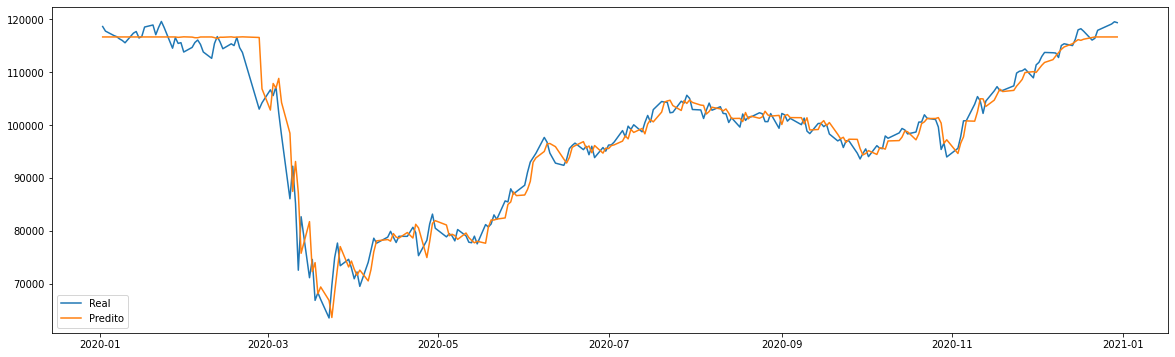

In [24]:
rcParams['figure.figsize'] = 20, 6
plt.pyplot.plot(data_dis, label='Real')
plt.pyplot.plot(yhat_dis, label='Predito')
plt.pyplot.legend()
plt.pyplot.show()